<div style="
    background-color:#f0f8ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    text-align: center;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h1 style="color:#003366;">📧 Email/SMS Spam Classifier | ML Model (97% Accuracy)</h1>


</div>

![ALT TexT](https://cdn.glockapps.com/wp-content/uploads/2023/12/11.png)

<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">🧭 Table of Contents</h2>

<ol style="color:#003366; font-size:16px; text-align:left; line-height:1.7;">
    <li><a href="#introduction" style="color:#00509e;">Introduction</a></li>
    <li><a href="#data-overview" style="color:#00509e;">Data Cleaning</a></li>
    <li><a href="#eda" style="color:#00509e;">Exploratory Data Analysis (EDA)</a></li>
     <li><a href="#eda" style="color:#00509e;">Text Preprocessing</a></li>
    <li><a href="#feature-engineering" style="color:#00509e;">Feature Engineering</a></li>
    <li><a href="#model-building-Evaluation" style="color:#00509e;">Model Building & Evaluation</a></li>
    
<li><a href="#conclusion" style="color:#00509e;">Conclusion</a></li>
</ol>

</div>

<a id="introduction"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">📖 Introduction</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
Every day, people receive unwanted or suspicious messages through emails and SMS. These unwanted messages, known as <b>spam</b>, can waste time or even contain harmful content.  
<br><br>
This project focuses on building a <b>Machine Learning-based Spam Classifier</b> that automatically detects whether a message is <b>spam</b> or <b>ham (non-spam)</b> using <b>TF-IDF</b> features and the <b>Multinomial Naive Bayes</b> algorithm.  
<br><br>


</div>


<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix,classification_report


<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">Reading & Understanding Our Data</h2>

Let's read the data into pandas dataframe and look at the first 5 rows using the head() method.

In [2]:
# Load the Dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5385,ham,How do friends help us in problems? They give ...,NaN,NaN,NaN
4354,ham,"Sorry, I can't help you on this.",NaN,NaN,NaN
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...,NaN,NaN,NaN
3239,ham,A cute thought for friendship: \Its not necess...,"but watever u shared should be true\""....""",NaN,NaN


Let's find out how many entries there are in our dataset, using shape function.

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">Data Cleaning</h2>

In [5]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
# rename the columns
df.rename(columns={'v1': 'Target','v2': 'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [8]:
# check duplicate values
(df.duplicated().sum())
# Remove Duplicate values
df = df.drop_duplicates(keep='first')

Now, the shape of dataset after removed duplicates values

In [9]:
df.shape

(5169, 2)

<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">🧹 Data Cleaning Observation</h2>

<ul style="color:#003366; font-size:16px; text-align:justify; line-height:1.7;">
    <li>No null values were found in the dataset.</li>
    <li>A total of <b>403 duplicate records</b> were identified and removed.</li>
    <li><b>Three unnecessary columns</b> were dropped to retain only relevant information.</li>
    <li>After cleaning, the dataset shape is now <b>(5169, 2)</b>.</li>
    <li>Columns were <b>renamed</b> for better readability.</li>
</ul>

</div>


<a id="eda"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">📊 Exploratory Data Analysis (EDA)</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
In this section, we explore the dataset to understand the distribution of spam and ham messages, analyze message lengths, and observe key text patterns.  
The visualizations below help reveal insights about how spam messages differ from non-spam ones in terms of frequency, word count, and other characteristics.
</p>

</div>


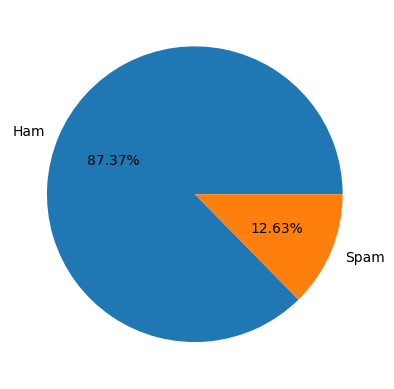

In [10]:
plt.pie(df['Target'].value_counts(),labels = ['Ham','Spam'],autopct="%0.2f%%")
plt.show()

Observation : This shows the dataset is imbalanced — more ham messages than spam.

In [11]:
# Number of Character
df['num_character'] = df['Text'].apply(len)
# Number of Words
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
# Number of sentence
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_character,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


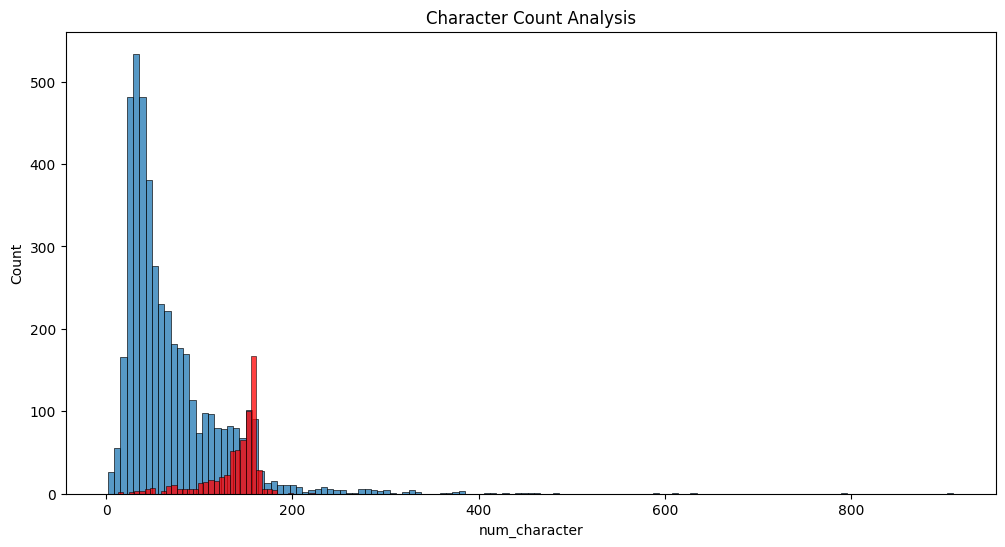

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 'ham' ]['num_character'])  
sns.histplot(df[df['Target'] == 'spam' ]['num_character'],color='red') 
plt.title("Character Count Analysis")
plt.show()

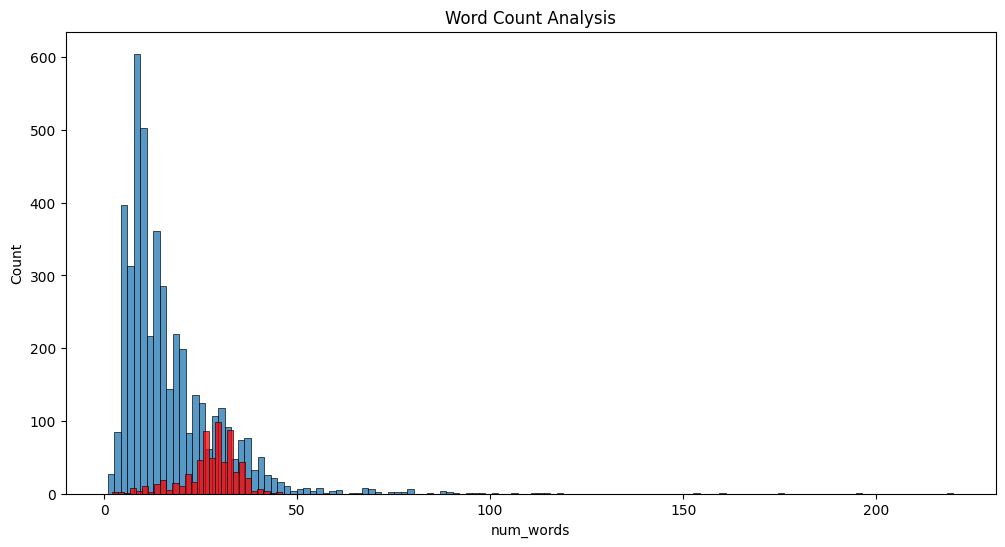

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 'ham']['num_words'])
sns.histplot(df[df['Target'] == 'spam']['num_words'],color='red')
plt.title("Word Count Analysis")
plt.show()

**Observation:**

Spam messages are generally longer and use more promotional or urgent words, while Ham messages are shorter and conversational.

<a id="text-preprocessing"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">🧩 Text Preprocessing</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
Before training the model, the text data was cleaned and prepared to ensure better learning performance.  
The following preprocessing steps were applied to each message:
</p>

<ul style="color:#003366; font-size:16px; text-align:justify; line-height:1.7;">
    <li>Converted all text to lowercase for consistency.</li>
    <li>Removed punctuation, special symbols, and extra spaces.</li>
    <li>Tokenized the text into individual words.</li>
    <li>Removed common stopwords (e.g., "the", "is", "and").</li>
    <li>Applied stemming to reduce words to their base forms (e.g., "running" → "run").</li>
</ul>

<p style="color:#003366; font-size:16px; text-align:justify;">
After preprocessing, the text was clean, uniform, and ready for feature extraction using TF-IDF.
</p>

</div>


In [15]:
ps = PorterStemmer()

def clean_text(Text):
    # Lowercase
    Text = Text.lower()
    # Tokenize
    Text = nltk.word_tokenize(Text)
    
    # Remove non-alphanumeric
    y = []
    for word in Text:
        if word.isalnum():
            y.append(word)
    
    Text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation, and apply stemming
    for word in Text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))
    
    return " ".join(y)

# Apply cleaning
df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Target,Text,num_character,num_words,num_sentences,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


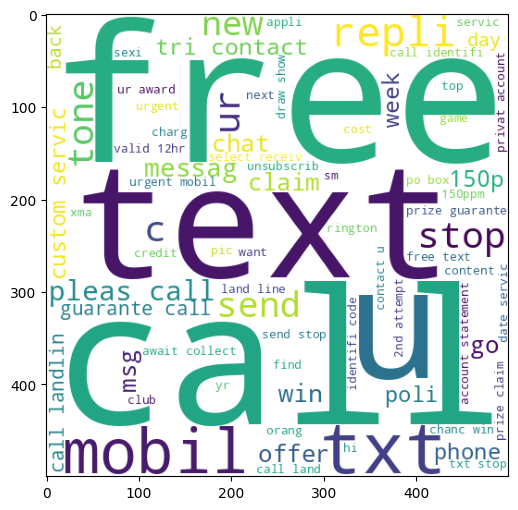

In [16]:
# Spam words
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['Target'] == 'spam' ]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)
plt.show()

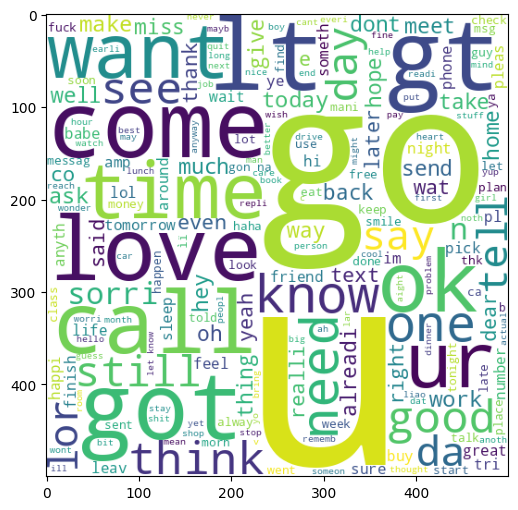

In [17]:
# Ham words
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['Target'] == 'ham' ]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)
plt.show()

In [18]:
# Extract spam messages
spam_corpus = []
for msg in df[df['Target'] == 'spam']['cleaned_text'].tolist():
   for word in msg.split():
       spam_corpus.append(word)
print("Length of spam corpus",len(spam_corpus))      
    

Length of spam corpus 9939


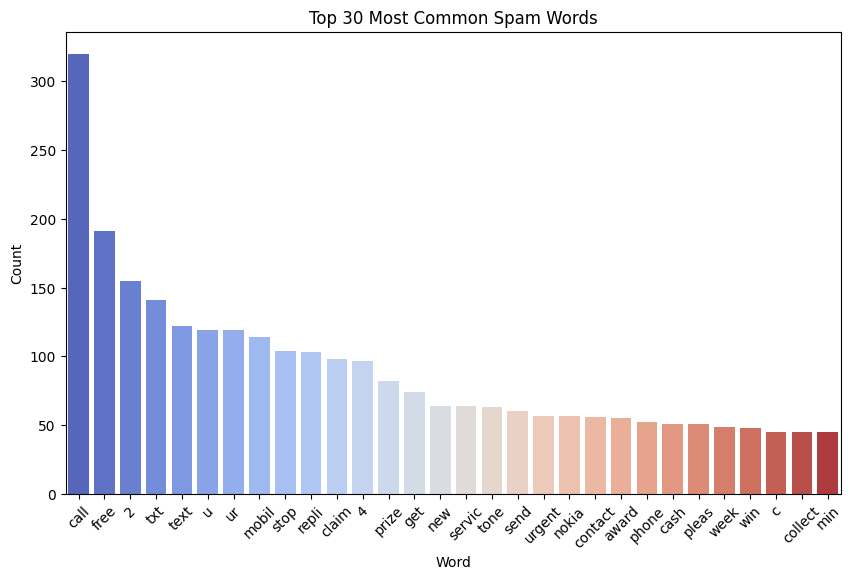

In [19]:
# Create DataFrame from the 30 most common spam words
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using named arguments
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=spam_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Spam Words")
plt.show()

**Top Word Frequency:**

Spam: frequent words include “FREE”, “WINNER”, “CLAIM”, “URGENT”, etc.

In [20]:
# Extract Ham messages
ham_corpus = []
for msg in df[df['Target'] == 'ham']['cleaned_text'].tolist():
   for word in msg.split():
       ham_corpus.append(word)
print("Length of Ham corpus",len(ham_corpus))           

Length of Ham corpus 35404


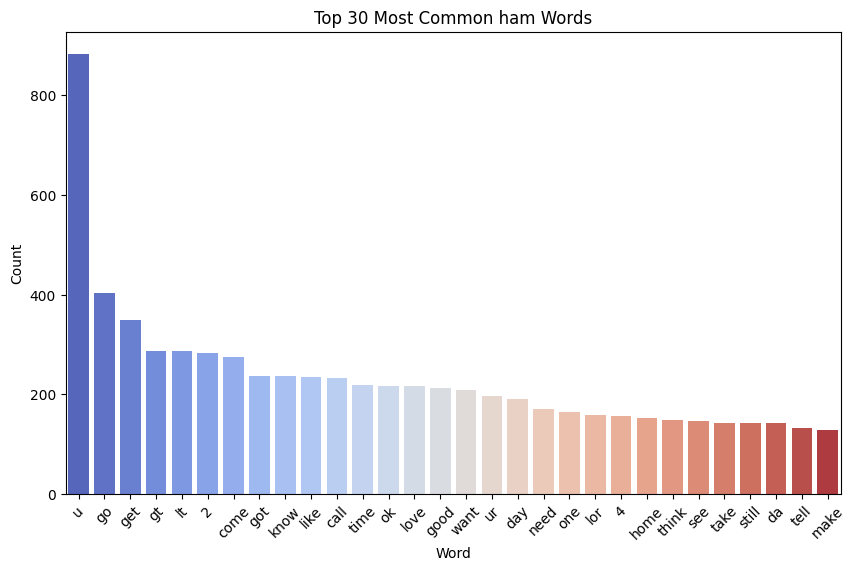

In [21]:
# Create DataFrame from the 30 most common spam words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using named arguments
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=ham_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common ham Words")
plt.show()

**Top Frequency Word**

Ham: frequent words include “Ok”, “go”, “Come”, “Got”, etc.

<a id="feature-engineering"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">⚙️ Feature Engineering (TF-IDF Vectorization)</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
After preprocessing the text data, the next step was to convert it into a numerical format that machine learning models can understand.  
We used <b>TF-IDF (Term Frequency – Inverse Document Frequency)</b> vectorization to transform each message into a vector of numerical values.
</p>

<ul style="color:#003366; font-size:16px; text-align:justify; line-height:1.7;">
    <li><b>TF (Term Frequency):</b> Measures how frequently a word appears in a message.</li>
    <li><b>IDF (Inverse Document Frequency):</b> Reduces the weight of common words that appear in many messages.</li>
    <li>This technique helps highlight words that are more meaningful for distinguishing between <b>spam</b> and <b>ham</b>.</li>
</ul>

<p style="color:#003366; font-size:16px; text-align:justify;">
The resulting TF-IDF matrix was then used as input features for the <b>Multinomial Naive Bayes</b> model.
</p>

</div>


In [22]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target']) # ham = 0, spam = 1
tfidf = TfidfVectorizer(max_features=3000)# limit to top 3000 frequent words
X = tfidf.fit_transform(df['cleaned_text']).toarray()
X.shape

(5169, 3000)

In [23]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

<a id="model-building"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">🤖 Model Building & Evaluation</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
For this project, the <b>Multinomial Naive Bayes</b> algorithm was chosen because it performs exceptionally well on text classification tasks.  
The model was trained on the <b>TF-IDF feature vectors</b> generated from the cleaned text data.
</p>

<ul style="color:#003366; font-size:16px; text-align:justify; line-height:1.7;">
    <li>The dataset was split into training and testing sets.</li>
    <li>The model learned the patterns and word frequencies associated with <b>spam</b> and <b>ham</b> messages.</li>
    <li>After training, predictions were made on the test data.</li>
    <li>Performance was evaluated using metrics such as <b>accuracy, precision, recall,</b> and <b>F1-score</b>.</li>
</ul>



</div>


# Train & Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4135, 3000), (1034, 3000), (4135,), (1034,))

This keeps 80% of data for training, 20% for testing.

# Train the Model

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

 # Make Predictions

In [26]:
y_pred = mnb.predict(X_test)

 # Evaluation

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("/nConfusion Matrix:", confusion_matrix(y_test,y_pred))
print("/nClassification Report:/n",classification_report(y_test,y_pred))
print("Precision Score:" , precision_score(y_test,y_pred))

Accuracy: 0.9709864603481625
/nConfusion Matrix: [[896   0]
 [ 30 108]]
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Precision Score: 1.0


In [28]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.967603,1.000000,0.983535,896.000000
1,1.000000,0.782609,0.878049,138.000000
accuracy,0.970986,0.970986,0.970986,0.970986
macro avg,0.983801,0.891304,0.930792,1034.000000
weighted avg,0.971926,0.970986,0.969456,1034.000000


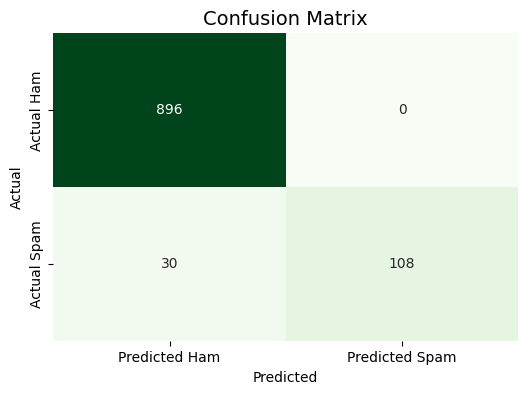

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<a id="conclusion"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">🏁 Conclusion</h2>

<p style="color:#003366; font-size:16px; text-align:justify;">
This project successfully developed an <b>Email/SMS Spam Classifier</b> capable of distinguishing between <b>spam</b> and <b>ham</b> messages using machine learning techniques.  
Through text preprocessing, TF-IDF feature extraction, and the <b>Multinomial Naive Bayes</b> model, we achieved an excellent accuracy of <b>97%</b>.


<a id="summary"></a>
<div style="
    background-color:#e6f2ff;
    border: 2px solid #4682b4;
    border-radius: 10px;
    padding: 15px;
    box-shadow: 2px 2px 8px #dcdcdc;
">

<h2 style="color:#003366;">📝 Notebook Summary & Credits</h2>

<ul style="color:#003366; font-size:16px; text-align:justify; line-height:1.7;">
    <li><b>Project Title:</b> Email/SMS Spam Classifier | ML Model (97% Accuracy)</li>
    <li><b>Created By:</b> <b>Anila Bukhari</b></li>
    <li><b>Tech Stack:</b> Python, Pandas, Scikit-learn, TF-IDF, Multinomial Naive Bayes</li>

<p style="color:#003366; font-size:16px; text-align:center;">
⭐ If you found this notebook helpful, don’t forget to <b>upvote</b> and leave a <b>comment</b>!  
<br>Thank you for exploring this project 💙
</p>

</div>
